**Исходная база данных**



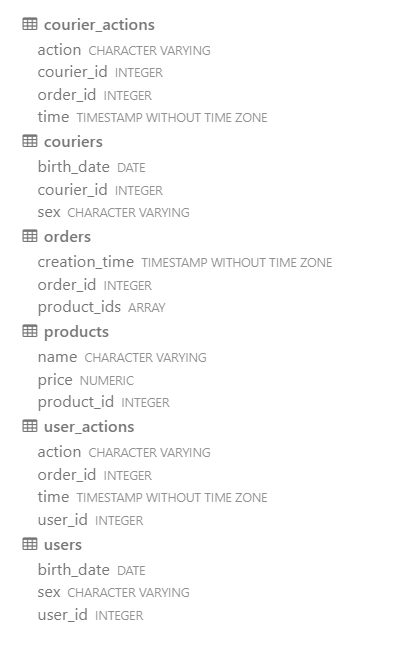

Задание:

Для каждой даты в таблице user_actions посчитайте количество первых заказов, совершённых пользователями.

Первыми заказами будем считать заказы, которые пользователи сделали в нашем сервисе впервые. В расчётах учитывайте только неотменённые заказы.

В результат включите две колонки: дату и количество первых заказов в эту дату. Колонку с датами назовите date, а колонку с первыми заказами — first_orders.

Результат отсортируйте по возрастанию даты.

Поля в результирующей таблице: date, first_orders

Ваше решение:

SELECT t1.date as date ,
       count(t2.user_id) as first_orders
FROM   (SELECT time::date as date
        FROM   user_actions
        GROUP BY date) as t1
    RIGHT JOIN (SELECT min(time):: date as date,
                       user_id
                FROM   user_actions
                WHERE  order_id not in (SELECT order_id
                                        FROM   user_actions
                                        WHERE  action = 'cancel_order')
                GROUP BY user_id) as t2
        ON t1.date = t2.date
GROUP BY t1.date
ORDER BY date


In [ ]:
Задание:

Используя функцию unnest, определите 10 самых популярных товаров в таблице orders.

Самыми популярными товарами будем считать те, которые встречались в заказах чаще всего. Если товар встречается в одном заказе несколько раз (когда было куплено несколько единиц товара), это тоже учитывается при подсчёте. Учитывайте только неотменённые заказы.

Выведите id товаров и то, сколько раз они встречались в заказах (то есть сколько раз были куплены). Новую колонку с количеством покупок товаров назовите times_purchased.

Результат отсортируйте по возрастанию id товара.

Поля в результирующей таблице: product_id, times_purchased

Ваше решение:

SELECT product_id,
       times_purchased FROM(SELECT count(id) as times_purchased,
                            id as product_id
                     FROM   (SELECT unnest(product_ids) as id
                             FROM   orders
                             WHERE  order_id not in (SELECT order_id
                                                     FROM   user_actions
                                                     WHERE  action like 'can%')) as st
                     GROUP BY product_id
                     ORDER BY times_purchased desc limit 10) t2
ORDER BY product_id

In [ ]:
Задание:

Из таблицы orders выведите id и содержимое заказов, которые включают хотя бы один из пяти самых дорогих товаров, доступных в нашем сервисе.

Результат отсортируйте по возрастанию id заказа.

Поля в результирующей таблице: order_id, product_ids

Ваше решение:

SELECT DISTINCT order_id,
                product_ids
FROM   (SELECT order_id,
               unnest(product_ids) as product_id_1,
               product_ids
        FROM   orders) a
WHERE  product_id_1 in (SELECT product_id
                        FROM   products
                        GROUP BY product_id
                        ORDER BY price desc limit 5)
ORDER BY order_id

In [ ]:
Задание:

Используя запрос из предыдущего задания, рассчитайте суммарную стоимость каждого заказа. Выведите колонки с id заказов и их стоимостью. Колонку со стоимостью заказа назовите order_price. Результат отсортируйте по возрастанию id заказа.

Добавьте в запрос оператор LIMIT и выведите только первые 1000 строк результирующей таблицы.

Поля в результирующей таблице: order_id, order_price

Ваше решение:

SELECT order_id,
       sum(price) as order_price
FROM   (SELECT order_id,
               unnest(product_ids) as product_id
        FROM   orders)as t1
    LEFT JOIN products as t2
        ON t1.product_id = t2.product_id
GROUP BY order_id
ORDER BY order_id limit 1000

In [ ]:
Задание:

Снова объедините таблицы user_actions и orders, но теперь оставьте только уникальные неотменённые заказы (мы делали похожий запрос на прошлом уроке). Остальные условия задачи те же: вывести id пользователей и заказов, а также список товаров в заказе. Отсортируйте таблицу по id пользователя по возрастанию, затем по id заказа — тоже по возрастанию.

Добавьте в запрос оператор LIMIT и выведите только первые 1000 строк результирующей таблицы.

Поля в результирующей таблице: user_id, order_id, product_ids

Ваше решение:

SELECT user_id,
       t1.order_id,
       product_ids
FROM   (SELECT order_id,
               user_id
        FROM   user_actions
        WHERE  order_id not in (SELECT order_id
                                FROM   user_actions
                                WHERE  action = 'cancel_order')) as t1
    LEFT JOIN orders as t2
        ON t1.order_id = t2.order_id
ORDER BY user_id, order_id limit 1000

In [ ]:
Задание:

Для начала к таблице с заказами (orders) примените функцию unnest, как мы делали в прошлом уроке. Колонку с id товаров назовите product_id. Затем к образовавшейся расширенной таблице по ключу product_id добавьте информацию о ценах на товары (из таблицы products). Должна получиться таблица с заказами, товарами внутри каждого заказа и ценами на эти товары. Выведите колонки с id заказа, id товара и ценой товара. Результат отсортируйте сначала по возрастанию id заказа, затем по возрастанию id товара.

Добавьте в запрос оператор LIMIT и выведите только первые 1000 строк результирующей таблицы.

Поля в результирующей таблице: order_id, product_id, price

Ваше решение:

SELECT order_id,
       t1.product_id,
       price
FROM   (SELECT order_id,
               unnest(product_ids) as product_id
        FROM   orders)as t1
    LEFT JOIN products as t2
        ON t1.product_id = t2.product_id
ORDER BY order_id, product_id limit 1000

In [ ]:
Отметьте в отдельной таблице тех курьеров, которые доставили в сентябре 2022 года заказов больше, чем в среднем все курьеры.

Сначала для каждого курьера в таблице courier_actions рассчитайте общее количество доставленных в сентябре заказов. Затем в отдельном столбце с помощью оконной функции укажите, сколько в среднем заказов доставили в этом месяце все курьеры. После этого сравните число заказов, доставленных каждым курьером, со средним значением в новом столбце. Если курьер доставил больше заказов, чем в среднем все курьеры, то в отдельном столбце с помощью CASE укажите число 1, в противном случае укажите 0.

Колонку с результатом сравнения назовите is_above_avg, колонку с числом доставленных заказов каждым курьером — delivered_orders, а колонку со средним значением — avg_delivered_orders. При расчёте среднего значения округлите его до двух знаков после запятой. Результат отсортируйте по возрастанию id курьера.

Поля в результирующей таблице: courier_id, delivered_orders, avg_delivered_orders, is_above_avg

Ваше решение:

SELECT courier_id,
       count(order_id) as delivered_orders ,
       round(avg(count(order_id)) OVER (), 2) as avg_delivered_orders,
       case when count(order_id) > avg(count(order_id)) OVER () then 1
            when count(order_id) < avg(count(order_id)) OVER () then 0 end as is_above_avg
FROM   courier_actions
WHERE  action like 'del%'
   and time between '2022-09-01'
   and '2022-10-01'
GROUP BY courier_id
ORDER BY courier_id

In [ ]:
Задание:

Сначала на основе таблицы orders сформируйте новую таблицу с общим числом заказов по дням. Вы уже делали это в одной из предыдущих задач. При подсчёте числа заказов не учитывайте отменённые заказы (их можно определить по таблице user_actions). Колонку с числом заказов назовите orders_count.

Затем поместите полученную таблицу в подзапрос и примените к ней оконную функцию в паре с агрегирующей функцией AVG для расчёта скользящего среднего числа заказов. Скользящее среднее для каждой записи считайте по трём предыдущим дням. Подумайте, как правильно задать границы рамки, чтобы получить корректные расчёты.

Полученные значения скользящего среднего округлите до двух знаков после запятой. Колонку с рассчитанным показателем назовите moving_avg. Сортировку результирующей таблицы делать не нужно.

Поля в результирующей таблице: date, orders_count, moving_avg

Ваше решение:

SELECT date ,
       orders_count,
       round(avg(orders_count) OVER(ORDER BY date rows between 3 preceding and 1 preceding),
             2) as moving_avg
FROM   (SELECT date,
               orders_count
        FROM   (SELECT creation_time::date as date ,
                       count(order_id) as orders_count
                FROM   orders
                WHERE  order_id not in (SELECT order_id
                                        FROM   user_actions
                                        WHERE  action like 'ca%')
                GROUP BY date) t1) t2

In [ ]:
Задание:

На основе запроса из предыдущего задания для каждого пользователя рассчитайте, сколько в среднем времени проходит между его заказами. Посчитайте этот показатель только для тех пользователей, которые за всё время оформили более одного неотмененного заказа.

Среднее время между заказами выразите в часах, округлив значения до целого числа. Колонку со средним значением времени назовите hours_between_orders. Результат отсортируйте по возрастанию id пользователя.

Добавьте в запрос оператор LIMIT и включите в результат только первые 1000 записей.

Поля в результирующей таблице: user_id, hours_between_orders

Ваше решение:

SELECT user_id,
       (extract(epoch
FROM   avg(time_diff)) / 3600)::integer as hours_between_orders
FROM   (SELECT user_id,
               order_id,
               time,
               row_number() OVER (PARTITION BY user_id
                                  ORDER BY time) as order_number,
               lag(time, 1) OVER (PARTITION BY user_id
                                  ORDER BY time) as time_lag,
               time - lag(time, 1) OVER (PARTITION BY user_id
                                         ORDER BY time) as time_diff
        FROM   user_actions
        WHERE  order_id not in (SELECT order_id
                                FROM   user_actions
                                WHERE  action = 'cancel_order')
        ORDER BY user_id, order_number) t1
WHERE  time_diff is not null
GROUP BY user_id 
limit 1000

In [ ]:
Задание:

Дополните запрос из предыдущего задания и с помощью оконной функции для каждого заказа каждого пользователя рассчитайте, сколько времени прошло с момента предыдущего заказа. 

Для этого сначала в отдельном столбце с помощью LAG сделайте смещение по столбцу time на одно значение назад. Столбец со смещёнными значениями назовите time_lag. Затем отнимите от каждого значения в колонке time новое значение со смещением (либо можете использовать уже знакомую функцию AGE). Колонку с полученным интервалом назовите time_diff. Менять формат отображения значений не нужно, они должны иметь примерно следующий вид:

3 days, 12:18:22


По-прежнему не учитывайте отменённые заказы. Также оставьте в запросе порядковый номер каждого заказа, рассчитанный на прошлом шаге. Результат отсортируйте сначала по возрастанию id пользователя, затем по возрастанию порядкового номера заказа.

Добавьте в запрос оператор LIMIT и выведите только первые 1000 строк результирующей таблицы.

Поля в результирующей таблице: user_id, order_id, time, order_number, time_lag, time_diff

Ваше решение:

SELECT user_id,
       order_id,
       time,
       row_number() OVER(PARTITION BY user_id
                         ORDER BY time) as order_number,
       lag(time, 1) OVER(PARTITION BY user_id) as time_lag,
       age(time , lag(time, 1) OVER(PARTITION BY user_id)) as time_diff
FROM   user_actions
WHERE  order_id not in (SELECT order_id
                        FROM   user_actions
                        WHERE  action like 'can%')
ORDER BY user_id, order_number limit 1000

In [ ]:
Задание:

Для каждого пользователя в таблице user_actions посчитайте порядковый номер каждого заказа.

Для этого примените оконную функцию ROW_NUMBER к колонке с временем заказа. Не забудьте указать деление на партиции по пользователям и сортировку внутри партиций. Отменённые заказы не учитывайте.

Новую колонку с порядковым номером заказа назовите order_number. Результат отсортируйте сначала по возрастанию id пользователя, затем по возрастанию порядкового номера заказа.

Добавьте в запрос оператор LIMIT и выведите только первые 1000 строк результирующей таблицы.

Поля в результирующей таблице: user_id, order_id, time, order_number

Ваше решение:

SELECT user_id,
       order_id,
       time,
       row_number() OVER(PARTITION BY user_id
                         ORDER BY time) as order_number
FROM   user_actions
WHERE  order_id not in (SELECT order_id
                        FROM   user_actions
                        WHERE  action like 'can%')
ORDER BY user_id, order_number limit 1000

In [ ]:
Задание:

Сначала на основе таблицы orders сформируйте новую таблицу с общим числом заказов по дням. При подсчёте числа заказов не учитывайте отменённые заказы (их можно определить по таблице user_actions). Колонку с днями назовите date, а колонку с числом заказов — orders_count.

Затем поместите полученную таблицу в подзапрос и примените к ней оконную функцию в паре с агрегирующей функцией SUM для расчёта накопительной суммы числа заказов. Не забудьте для окна задать инструкцию ORDER BY по дате.

Колонку с накопительной суммой назовите orders_cum_count. В результате такой операции значение накопительной суммы для последнего дня должно получиться равным общему числу заказов за весь период.

Сортировку результирующей таблицы делать не нужно.

Поля в результирующей таблице: date, orders_count, orders_cum_count

Ваше решение:

SELECT date,
       orders_count,
       (sum(orders_count) OVER(ORDER BY date))::integer as orders_cum_count
FROM   (SELECT creation_time::date as date ,
               count(order_id) as orders_count
        FROM   orders
        WHERE  order_id not in (SELECT order_id
                                FROM   user_actions
                                WHERE  action like 'ca%')
        GROUP BY date) t1

In [ ]:
Задание:

Для каждого дня недели в таблице user_actions посчитайте:

Общее количество оформленных заказов.
Общее количество отменённых заказов.
Общее количество неотменённых заказов (т.е. доставленных).
Долю неотменённых заказов в общем числе заказов (success rate).
Новые колонки назовите соответственно created_orders, canceled_orders, actual_orders и success_rate. Колонку с долей неотменённых заказов округлите до трёх знаков после запятой.

Все расчёты проводите за период с 24 августа по 6 сентября 2022 года включительно, чтобы во временной интервал попало равное количество разных дней недели.

Группы сформируйте следующим образом: выделите день недели из даты с помощью функции to_char с параметром 'Dy', также выделите порядковый номер дня недели с помощью функции DATE_PART с параметром 'isodow'. Далее сгруппируйте данные по двум полям и проведите все необходимые расчёты.

В результате должна получиться группировка по двум колонкам: с порядковым номером дней недели и их сокращёнными наименованиями.

Результат отсортируйте по возрастанию порядкового номера дня недели.

Поля в результирующей таблице: weekday_number, weekday, created_orders, canceled_orders, actual_orders, success_rate

Ваше решение:

SELECT date_part('isodow', time)::integer as weekday_number,
       to_char(time,'Dy') as weekday,
       count(order_id) filter (WHERE action not like 'ca%') as created_orders,
       count(order_id) filter (WHERE action like 'ca%') as canceled_orders,
       count(order_id) filter (WHERE action not like 'ca%') - count(order_id) filter (WHERE action like 'ca%') as actual_orders,
       round((count(order_id) filter (WHERE action not like 'ca%') - count(order_id) filter (WHERE action like 'ca%'))::decimal / (count(order_id) filter (WHERE action not like 'ca%'))::decimal,
             3) as success_rate
FROM   user_actions
WHERE  time between '2022-08-24'
   and '2022-09-07'
GROUP BY weekday, weekday_number
ORDER BY weekday_number

In [ ]:
Задание:

Для каждого пользователя в таблице user_actions посчитайте общее количество оформленных заказов и долю отменённых заказов.

Новые колонки назовите соответственно orders_count и cancel_rate. Колонку с долей отменённых заказов округлите до двух знаков после запятой.

В результат включите только тех пользователей, которые оформили больше трёх заказов и у которых показатель cancel_rate составляет не менее 0.5.

Результат отсортируйте по возрастанию id пользователя.

Поля в результирующей таблице: user_id, orders_count, cancel_rate

Ваше решение:

SELECT user_id,
       count(order_id) filter (WHERE action = 'create_order') as orders_count,
       count(order_id) filter (WHERE action = 'cancel_order') / count(order_id) filter (WHERE action = 'create_order')::decimal as cancel_rate
FROM   user_actions
GROUP BY user_id having count(order_id) filter (
WHERE  action = 'create_order') > 3
   and count(order_id) filter (
WHERE  action = 'cancel_order') / count(order_id) filter (
WHERE  action = 'create_order')::decimal >= 0.5
ORDER BY user_id